# Analyze Quick Scans

## Summary

* Read data
* Locate start/end time for each scan
* Extract individual scans
* Apply corrections for dark, distance, and doppler
* Overplot spectra
* Determine wavelength shift vs. reference spectrum
* Apply wavelength shift
* Investigate any variation

## Preliminaries

In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
%matplotlib inline

from astropy.io import ascii    
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
from lasp import *

from scipy.optimize import curve_fit

## Read data

In [71]:
d = readDatasetByName( 'QuickScan')
cleanTelemetry(d)

## Plot grating position

This confirms we're looking at the correct dataset.

<function matplotlib.pyplot.show>

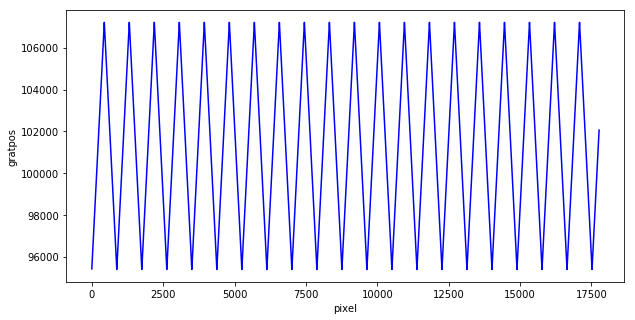

In [72]:
plt.figure(figsize=(10,5))
plt.plot( d['instrumentTelemetry']['gratPos'], 'b')
plt.xlabel( "pixel")
plt.ylabel( "gratpos")
plt.show

# Locate start/end time for each scan

<function matplotlib.pyplot.show>

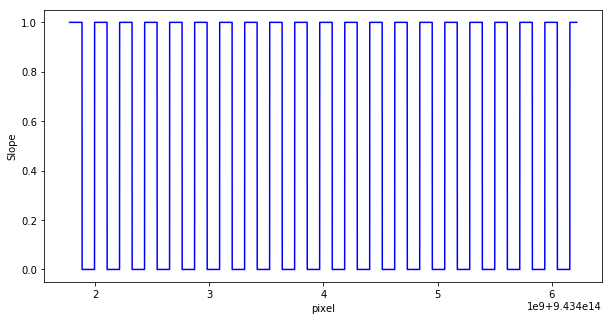

In [73]:
# convenience...
g = d['instrumentTelemetry']['gratPos']
t = d['instrumentTelemetry']['microsecondsSinceGpsEpoch']

ng = len(g)
i = 0

# determine slope...
def upSlope(g,i):
    '''
    Given array of grating positions (g), return True 
    if the next step will increase g, and False 
    if it will decrease.
    '''

    delta = g[i+1]-g[i]
    if delta > 0:
        return True
    elif delta < 0:
        return False
    else:
        raise ValueError('neither up nor down')

# allocat array...
upDown = np.zeros(ng-1)
upDownTime = np.zeros(ng-1)

# build array...
for i in range(ng-1):
    upDown[i] = upSlope(g,i)
    upDownTime[i] = t[i]
    
plt.figure(figsize=(10,5))
plt.plot( upDownTime, upDown, 'b')
plt.xlabel( "pixel")
plt.ylabel( "Slope")
plt.show

<function matplotlib.pyplot.show>

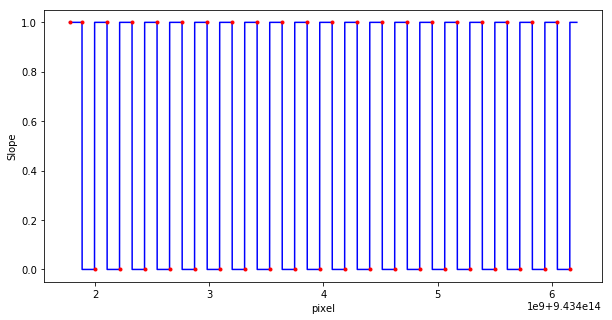

In [74]:
endPointIndex = list()

# set starting point...
endPointIndex.append(0)

# loop through array looking for inflection points...
for i in range(len(upDown)-1):
    if upDown[i+1] != upDown[i]:
        endPointIndex.append(i)

# plot endpoints...
plt.figure(figsize=(10,5))
plt.plot( upDownTime, upDown, 'b',
         upDownTime[endPointIndex], upDown[endPointIndex], 'r.')
plt.xlabel( "pixel")
plt.ylabel( "Slope")
plt.show

## Extract individual scans

In [75]:
# assemble a list of start and end times for each scan...
n = len(endPointIndex)
startTime = upDownTime[endPointIndex[0:n-1]]
endTime   = upDownTime[endPointIndex[1:n]]
midTimeList = list()
for (s,e) in zip(startTime,endTime):
    print s,e
    midTime   = 0.5*(s+e)
    midTimeList.append(midTime)

9.4340177751e+14 9.4340188651e+14
9.4340188651e+14 9.4340199601e+14
9.4340199601e+14 9.4340210551e+14
9.4340210551e+14 9.4340221501e+14
9.4340221501e+14 9.4340232451e+14
9.4340232451e+14 9.4340243401e+14
9.4340243401e+14 9.4340254351e+14
9.4340254351e+14 9.4340265301e+14
9.4340265301e+14 9.4340276251e+14
9.4340276251e+14 9.4340287201e+14
9.4340287201e+14 9.4340298151e+14
9.4340298151e+14 9.4340309101e+14
9.4340309101e+14 9.4340320051e+14
9.4340320051e+14 9.4340331001e+14
9.4340331001e+14 9.4340341951e+14
9.4340341951e+14 9.4340352901e+14
9.4340352901e+14 9.4340363851e+14
9.4340363851e+14 9.4340374801e+14
9.4340374801e+14 9.4340385751e+14
9.4340385751e+14 9.4340396701e+14
9.4340396701e+14 9.4340407651e+14
9.4340407651e+14 9.4340418601e+14
9.4340418601e+14 9.4340429551e+14
9.4340429551e+14 9.4340440501e+14
9.4340440501e+14 9.4340451451e+14
9.4340451451e+14 9.4340462401e+14
9.4340462401e+14 9.4340473351e+14
9.4340473351e+14 9.4340484301e+14
9.4340484301e+14 9.4340495251e+14
9.4340495251e+

In [76]:
# extract and plot scans...
d = readDatasetFull()
specdir = '../QuickScanData'

# loop over scans...
i = 0
for (t1,t2) in zip(startTime,endTime):

    # re-extract spectrum between these timestamps...
    s = sliceDatasetByTime( d, t1, t2)
    cleanTelemetry(s)
    addSpectrum( s, sort=True, darkCorrection=True, dopplerCorrection=True, distanceCorrection=True)

    spectrum = s['spectrum']
    outfile = "%s/quickScan%03d.txt" % (specdir, i)
    spectrum.write( outfile, format='csv')
    print ( "file=%s t1=%g t2=%g" % (outfile,t1,t2))
    i += 1

file=../QuickScanData/quickScan000.txt t1=9.43402e+14 t2=9.43402e+14
file=../QuickScanData/quickScan001.txt t1=9.43402e+14 t2=9.43402e+14
file=../QuickScanData/quickScan002.txt t1=9.43402e+14 t2=9.43402e+14
file=../QuickScanData/quickScan003.txt t1=9.43402e+14 t2=9.43402e+14
file=../QuickScanData/quickScan004.txt t1=9.43402e+14 t2=9.43402e+14
file=../QuickScanData/quickScan005.txt t1=9.43402e+14 t2=9.43402e+14
file=../QuickScanData/quickScan006.txt t1=9.43402e+14 t2=9.43403e+14
file=../QuickScanData/quickScan007.txt t1=9.43403e+14 t2=9.43403e+14
file=../QuickScanData/quickScan008.txt t1=9.43403e+14 t2=9.43403e+14
file=../QuickScanData/quickScan009.txt t1=9.43403e+14 t2=9.43403e+14
file=../QuickScanData/quickScan010.txt t1=9.43403e+14 t2=9.43403e+14
file=../QuickScanData/quickScan011.txt t1=9.43403e+14 t2=9.43403e+14
file=../QuickScanData/quickScan012.txt t1=9.43403e+14 t2=9.43403e+14
file=../QuickScanData/quickScan013.txt t1=9.43403e+14 t2=9.43403e+14
file=../QuickScanData/quickScan014

## Plot scans

We plot the region around the two emission lines.  We apply a constant y offset to each scan in order to separate the spectra for visualization purposes.

<function matplotlib.pyplot.show>

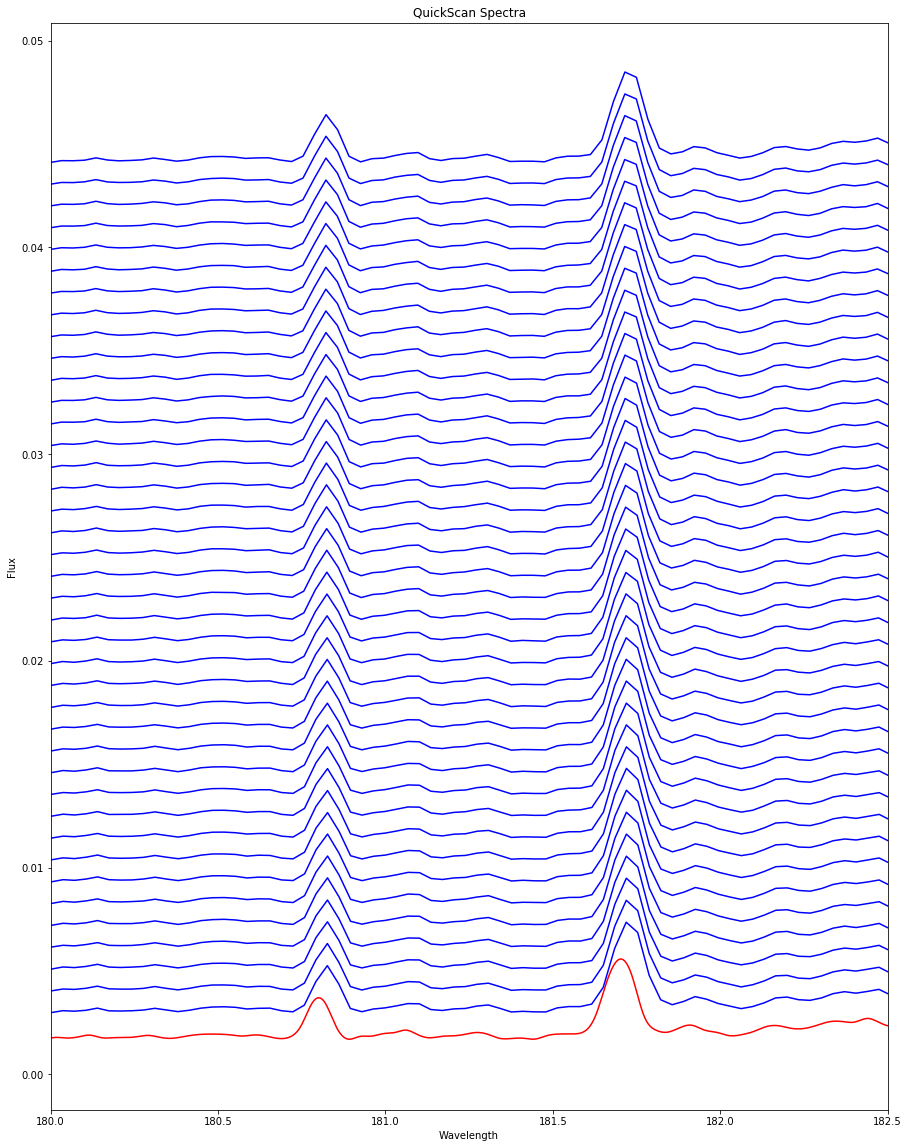

In [77]:
# start figure...
plt.figure(figsize=(15,20))

# read the reference spectrum....
inFile = indir + 'referenceSpectrum.txt'
referenceSpectrum = ascii.read( inFile)

# plot the reference spectrum...
plt.plot( referenceSpectrum['wavelength(nm)'], referenceSpectrum['irradiance (watts/m^2)'], 'r')
plt.xlabel( referenceSpectrum.colnames[0])
plt.ylabel( referenceSpectrum.colnames[1])

# loop over scans...
offset = 0
i = -1
while True:
    i += 1
    # read file...
    scanFile = "%s/quickScan%03d.txt" % (specdir, i)
    try:
        spectrum = ascii.read( scanFile)
    except:
        break
   
    if offset == 0:
        minflux = np.min(spectrum['irradiance (watts/m^2)'])
        maxflux = np.max(spectrum['irradiance (watts/m^2)'])
        delta = (maxflux-minflux)/5.
        
    offset += delta
    plt.plot( spectrum['wavelength(nm)'], spectrum['irradiance (watts/m^2)']+offset, 'b')

# complete the plot...
plt.xlabel( "Wavelength")
plt.ylabel( "Irradiance")
plt.title( 'QuickScan Spectra')
plt.xlim( 180.,182.5)
plt.show

## Measure wavelength shifts of each QuickScan spectrum

In [78]:
# define wavelength range to consider...
wMin = 181.25
wMax = 182.25

# allocate space to hold results...
xcList = list()
ampList = list()

# loop over scans...
i = -1
while True:
    
    i += 1
    
    # read file...
    scanFile = "%s/quickScan%03d.txt" % (specdir, i)
    try:
        spectrum = ascii.read( scanFile)
    except:
        break

    # fit a Gaussian curve to each spectrum...
    x,y = getRegionOfInterest( spectrum['wavelength(nm)'], 
                               spectrum['irradiance (watts/m^2)'], wMin, wMax)
    xc,amp = getCenter( x, y, fwhm=0.2, plot=False, title='Scan %d' % i)
    print 'i=%d xc=%.4f amp=%f' % (i,xc,amp)
    
    # save results...
    xcList.append(xc)
    ampList.append(amp)

i=0 xc=181.7261 amp=0.004201
i=1 xc=181.7261 amp=0.004204
i=2 xc=181.7262 amp=0.004215
i=3 xc=181.7262 amp=0.004215
i=4 xc=181.7262 amp=0.004229
i=5 xc=181.7263 amp=0.004231
i=6 xc=181.7261 amp=0.004234
i=7 xc=181.7261 amp=0.004237
i=8 xc=181.7263 amp=0.004235
i=9 xc=181.7261 amp=0.004236
i=10 xc=181.7262 amp=0.004245
i=11 xc=181.7262 amp=0.004258
i=12 xc=181.7261 amp=0.004246
i=13 xc=181.7261 amp=0.004243
i=14 xc=181.7262 amp=0.004253
i=15 xc=181.7261 amp=0.004254
i=16 xc=181.7262 amp=0.004250
i=17 xc=181.7261 amp=0.004263
i=18 xc=181.7262 amp=0.004251
i=19 xc=181.7262 amp=0.004255
i=20 xc=181.7262 amp=0.004260
i=21 xc=181.7261 amp=0.004264
i=22 xc=181.7263 amp=0.004260
i=23 xc=181.7261 amp=0.004251
i=24 xc=181.7261 amp=0.004259
i=25 xc=181.7261 amp=0.004253
i=26 xc=181.7262 amp=0.004265
i=27 xc=181.7261 amp=0.004258
i=28 xc=181.7262 amp=0.004256
i=29 xc=181.7261 amp=0.004254
i=30 xc=181.7261 amp=0.004266
i=31 xc=181.7261 amp=0.004265
i=32 xc=181.7262 amp=0.004267
i=33 xc=181.7261 amp

## Measure center of reference spectrum

In [110]:
# fit a Gaussian curve to each spectrum...
x,y = getRegionOfInterest( referenceSpectrum['wavelength(nm)'], 
                           referenceSpectrum['irradiance (watts/m^2)'], wMin, wMax)
xcRef,ampRef = getCenter( x, y, fwhm=0.2, plot=False)
print 'Reference: xc=%.4f amp=%f' % (xcRef,ampRef)

Reference: xc=181.7013 amp=0.003679


## Compute shift of quick scans vs. reference spectrum

In [109]:
# compute shifts for each scan...
dxList = xcList - xcRef

# compute the median shift...
dxMedian = np.median(dxList)
print dxMedian

0.024813220097


## Plot change in centers

<function matplotlib.pyplot.show>

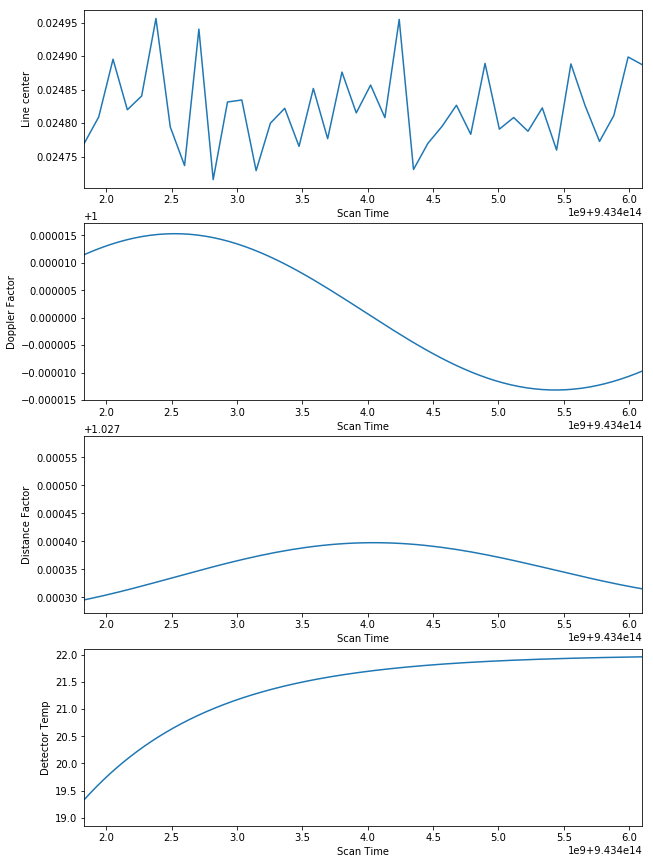

In [89]:
plt.figure(figsize=(10,15))

minTime = np.min(midTimeList)
maxTime = np.max(midTimeList)

# plot line centers...
plt.subplot(4, 1, 1)
plt.plot( midTimeList, dxList)
plt.xlabel( "Scan Time")
plt.ylabel( "Line center")
plt.xlim( minTime, maxTime)

# plot doppler correction...
plt.subplot(4, 1, 2)
plt.plot( d['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         d['distanceAndDoppler']['sunObserverDopplerFactor'])
plt.xlabel( "Scan Time")
plt.ylabel( "Doppler Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(4, 1, 3)
plt.plot( d['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         d['distanceAndDoppler']['sunObserverDistanceCorrection'])
plt.xlabel( "Scan Time")
plt.ylabel( "Distance Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(4, 1, 4)
plt.plot( d['detectorTemp']['microsecondsSinceGpsEpoch'], 
         d['detectorTemp']['temp (C)'])
plt.xlabel( "Scan Time")
plt.ylabel( "Detector Temp")
plt.xlim( minTime, maxTime)

plt.show

## Plot change in amplitude of emission line over time

<function matplotlib.pyplot.show>

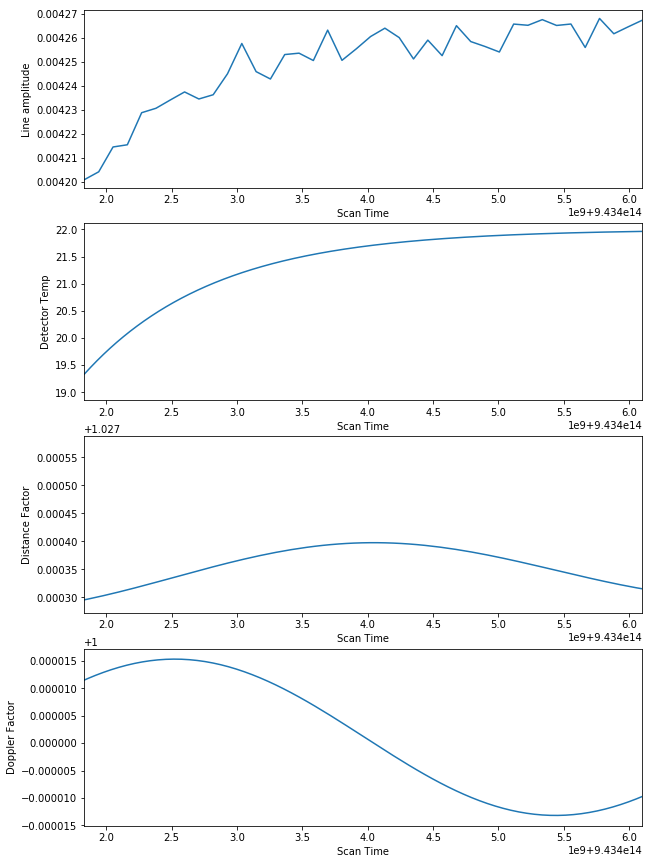

In [90]:
plt.figure(figsize=(10,15))

minTime = np.min(midTimeList)
maxTime = np.max(midTimeList)

# plot endpoints...
plt.subplot(4, 1, 1)
plt.plot( midTimeList, ampList)
plt.xlabel( "Scan Time")
plt.ylabel( "Line amplitude")
plt.xlim( minTime, maxTime)

# plot doppler correction...
plt.subplot(4, 1, 4)
plt.plot( d['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         d['distanceAndDoppler']['sunObserverDopplerFactor'])
plt.xlabel( "Scan Time")
plt.ylabel( "Doppler Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(4, 1, 3)
plt.plot( d['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         d['distanceAndDoppler']['sunObserverDistanceCorrection'])
plt.xlabel( "Scan Time")
plt.ylabel( "Distance Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(4, 1, 2)
plt.plot( d['detectorTemp']['microsecondsSinceGpsEpoch'], 
         d['detectorTemp']['temp (C)'])
plt.xlabel( "Scan Time")
plt.ylabel( "Detector Temp")
plt.xlim( minTime, maxTime)

plt.show

## Co-add the quick scans

The results above indicate that the individual quick scans are already aligned in wavelength, so we do not need to perform any wavelength shifting whn co-adding.

In [100]:
# allocate space to hold results...
meanSpectrum = Table()

# loop over scans...
i = -1
while True:
    
    i += 1
    
    # read file...
    scanFile = "%s/quickScan%03d.txt" % (specdir, i)
    try:
        spectrum = ascii.read( scanFile)
    except:
        break

    if i==0:
        wavelength = spectrum['wavelength(nm)']
        irradiance = spectrum['irradiance (watts/m^2)']
    else:
        # resample onto same wavelength scale...
        shiftedSpectrum = np.interp( wavelength, spectrum['wavelength(nm)'], spectrum['irradiance (watts/m^2)'])
        irradiance += shiftedSpectrum

irradiance = irradiance / i
print i

# apply wavelength shift to align mean spectrum with reference spectrum...
wavelength = wavelength - dxMedian

# store in Table object...
meanSpectrum['wavelength(nm)'] = wavelength
meanSpectrum['irradiance (watts/m^2)'] = irradiance

40


## Plot co-added quickScans vs. reference spectrum

<function matplotlib.pyplot.show>

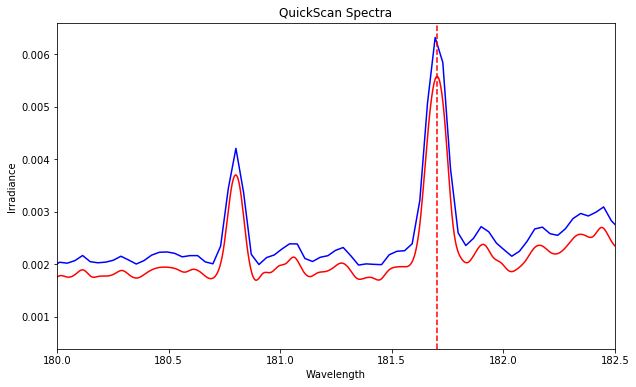

In [108]:
# start figure...
plt.figure(figsize=(10,6))

# plot the reference spectrum...
plt.plot( referenceSpectrum['wavelength(nm)'], referenceSpectrum['irradiance (watts/m^2)'], 'r',
        meanSpectrum['wavelength(nm)'], meanSpectrum['irradiance (watts/m^2)'], 'b')
plt.xlabel( referenceSpectrum.colnames[0])
plt.ylabel( referenceSpectrum.colnames[1])

# complete the plot...
plt.xlabel( "Wavelength")
plt.ylabel( "Irradiance")
plt.title( 'QuickScan Spectra')
plt.xlim( 180.,182.5)
plt.axvline(x=xcRef, color='r', linestyle='dashed')
plt.show

## Compute ratio of mean QuickScan vs. reference spectrum

In [112]:
# resample reference spectrum to align with scan
resampledReferenceSpectrumIrradiance = np.interp( meanSpectrum['wavelength(nm)'], 
                                                  referenceSpectrum['wavelength(nm)'], 
                                                  referenceSpectrum['irradiance (watts/m^2)'])

# compute ratio...
ratioSpectrum = Table()
ratioSpectrum['wavelength(nm)'] = meanSpectrum['wavelength(nm)']
ratioSpectrum['irradiance ratio'] = meanSpectrum['irradiance (watts/m^2)'] / resampledReferenceSpectrumIrradiance

## Plot the ratio

<function matplotlib.pyplot.show>

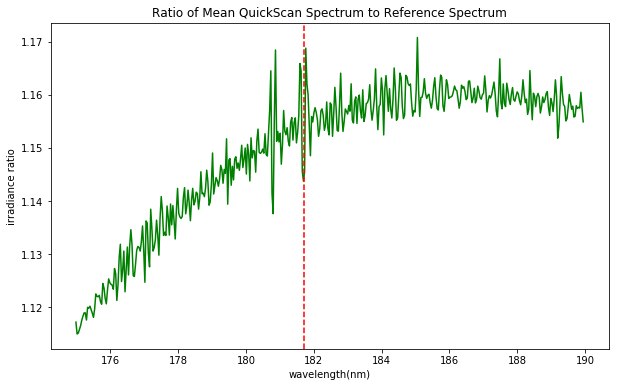

In [114]:
# start figure...
plt.figure(figsize=(10,6))

# plot the reference spectrum...
plt.plot( ratioSpectrum['wavelength(nm)'], ratioSpectrum['irradiance ratio'], 'g')
plt.xlabel( ratioSpectrum.colnames[0])
plt.ylabel( ratioSpectrum.colnames[1])
plt.title( 'Ratio of Mean QuickScan Spectrum to Reference Spectrum')
plt.axvline(x=xcRef, color='r', linestyle='dashed')
plt.show

## Conclusions

* The individual QuickScans were well aligned in wavelength following Doppler correction, indicating that the instrument was stable in wavelength.
* The QuickScans were shifted relative to the reference spectrum by 0.0248 nm, indicating a small inaccuracy in the grating position.
* The amplitude of the QuickScans increased over time, and seems correlated with detector temperature but not with the Doppler correction or the distance correction.  Assuming that the source of the radiation is constant, this could indicate that the detector gain changes with temperature. 
* The ratio of the average QuickScan irradiance to the reference spectrum shows a wavelength dependence.  This is consistent with the detector being more sensitive at redder wavelngths. 